# Saltelli's example (1.3)

In [1]:
from matplotlib import pyplot
import numpy
import pandas
from scipy import stats

import sensitivity_analysis


numpy.random.seed(1)


def model_full(Z_1, Z_2, Z_3, Z_4, Ω_1, Ω_2, Ω_3, Ω_4):
    y = (Ω_1 * Z_1 + Ω_2 * Z_2 + Ω_3 * Z_3 + Ω_4 * Z_4)
    try:
        return y.rename('y')
    except AttributeError:
        return y


def model_simple(Z_1, Z_2, Z_3, Z_4, Ω=2):
    return model_full(Z_1, Z_2, Z_3, Z_4, Ω, Ω, Ω, Ω)


Z = {f'Z_{i}': stats.norm(0, i)
     for i in range(1, 4 + 1)}
Ω = {f'Ω_{i}': stats.norm(i * 0.5, i) 
     for i in range(1, 4 + 1)}
parameters_simple = Z
parameters_full = dict(**Z, **Ω)

## Figure 1.6

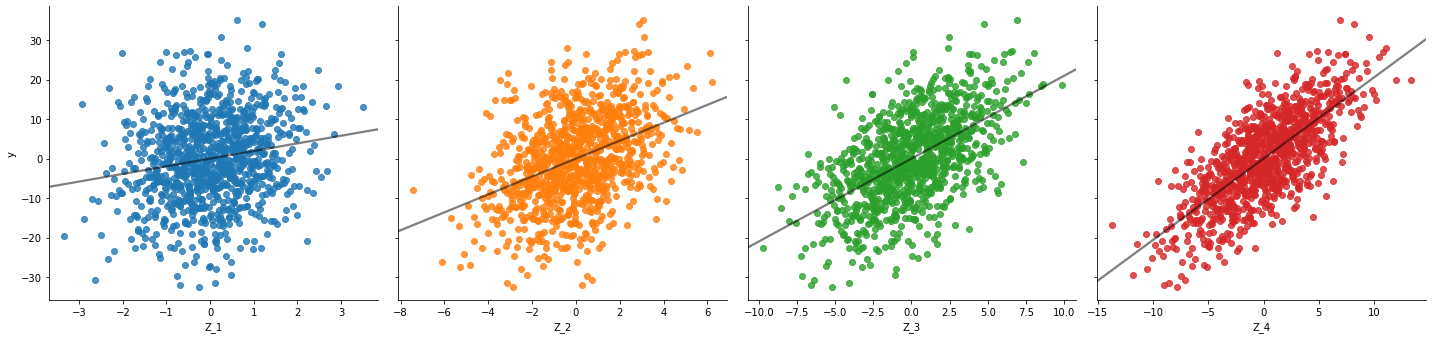

In [2]:
fg = sensitivity_analysis.scatterplots(model_simple,
                                       parameters_simple,
                                       n_samples=1000)

## Tables 1.1 & 1.2

In [3]:
def bold_sum(s):
    '''Made the 'Sum' row bold.'''
    is_sum = (s.index == 'Sum')
    return ['font-weight: bold' if v else '' for v in is_sum]


def display_with_sums(table):
    '''Add column sums and display.'''
    table = table.copy()
    table.loc['Sum'] = table.sum()
    return table.style.apply(bold_sum)
    

def get_all_sensitivities(model, parameters, n_samples):
    '''Run all of the sensitivity methods.'''
    table = {}
    # sensitivity = sensitivity_analysis.sensitivity(
    #     model, parameters, n_samples, normalized=False)
    # table[r'$S^2$'] = sensitivity ** 2
    # beta = sensitivity_analysis.linreg_coefficients(
    #     model, parameters, n_samples, normalized=False)
    # table[r'$\beta^2$'] = beta ** 2
    # table[r'$\nu$'] = sensitivity_analysis.DGSM(
    #     model, parameters, n_samples, normalized=False)
    sensitivity_sigma = sensitivity_analysis.sensitivity(
        model, parameters, n_samples)
    table[r'$S_{\sigma}^2$'] = sensitivity_sigma ** 2
    beta_sigma = sensitivity_analysis.linreg_coefficients(
        model, parameters, n_samples)
    table[r'$\beta_{\sigma}^2$'] = beta_sigma ** 2
    table[r'$\nu_{\sigma}$'] = sensitivity_analysis.DGSM(
        model, parameters, n_samples)
    (S, _, S_T, _) = sensitivity_analysis.Sobol_indexes(
        model, parameters, n_samples)
    table[r'$S$'] = S
    table[r'$S_T$'] = S_T
    return pandas.DataFrame(table)


table = get_all_sensitivities(model_simple,
                              parameters_simple,
                              n_samples=1000)
display_with_sums(table)

,$S_{\sigma}^2$,$\beta_{\sigma}^2$,$\nu_{\sigma}$,$S$,$S_T$
Z_1,0.0324652,0.0326822,0.0329123,0.0612784,0.0371131
Z_2,0.130442,0.130118,0.132543,0.132044,0.116955
Z_3,0.293499,0.293595,0.296881,0.270033,0.294118
Z_4,0.520514,0.52102,0.526379,0.563534,0.567545
Sum,0.97692,0.977416,0.988716,1.02689,1.01573


# Saltelli's example (1.3) & (1.27)

## Tables 1.3 & 1.5

In [4]:
table = get_all_sensitivities(model_full,
                              parameters_full,
                              n_samples=40000)
display_with_sums(table)

,$S_{\sigma}^2$,$\beta_{\sigma}^2$,$\nu_{\sigma}$,$S$,$S_T$
Z_1,0.000572322,0.000448746,0.00282067,0.00249304,0.00598867
Z_2,0.00915691,0.00887528,0.0451319,0.0120399,0.0521242
Z_3,0.0463541,0.0453363,0.22847,0.0473403,0.231105
Z_4,0.146502,0.148681,0.722137,0.143493,0.722741
Ω_1,4.16941e-14,2.56623e-07,0.00225654,0.00173259,0.00580295
Ω_2,4.79357e-12,1.96303e-06,0.0361062,4.32337e-05,0.0419928
Ω_3,1.65677e-11,1.76225e-05,0.182774,0.00352724,0.190348
Ω_4,2.01842e-11,9.0784e-06,0.577713,0.00488001,0.575415
Sum,0.202585,0.203371,1.79741,0.215549,1.82552


## Figure 1.10

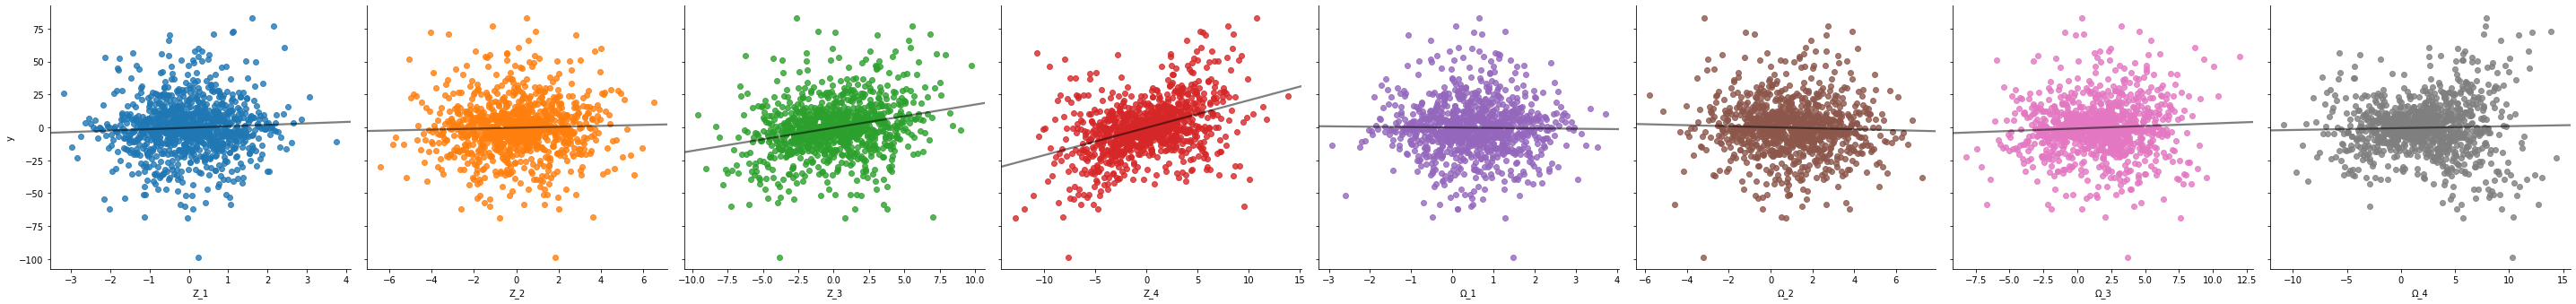

In [5]:
fg = sensitivity_analysis.scatterplots(model_full,
                                       parameters_full,
                                       n_samples=1000)